In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

In [39]:
file_paths = {
    "Pure_Al": "Stability Final_Pure_Al.xlsx",
    "AlGr0.5": "Stability Final_AlGr0.5.xlsx",
    "AlGr1": "Stability Final_AlGr1.xlsx",
}

In [40]:
def load_data(file_path):
    df = pd.read_excel(file_path)
    return df[["Time (Minutes)", "Current (microAmperes)"]]

In [41]:
combined_data = pd.concat(data.values())
X = combined_data[["Time (Minutes)"]]
y = combined_data["Current (microAmperes)"]

In [42]:
file_algr0_5 = 'Stability Final_AlGr0.5.xlsx'
file_algr1 = 'Stability Final_AlGr1.xlsx'
file_pure_al = 'Stability Final_Pure_Al.xlsx'

In [43]:
data_algr0_5 = pd.read_excel(file_algr0_5)
data_algr1 = pd.read_excel(file_algr1)
data_pure_al = pd.read_excel(file_pure_al)

In [44]:
features = ["Current (microAmperes)", "Time (Minutes)"]
algr0_5 = data_algr0_5[features]
algr1 = data_algr1[features]
pure_al = data_pure_al[features]

In [45]:
data_combined = pd.concat([algr0_5, algr1, pure_al])
X = data_combined[["Time (Minutes)"]]
y = data_combined[["Current (microAmperes)"]]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
nn_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [48]:
def monte_carlo_predict(model, X, n_simulations=100):
    predictions = [model.predict(X) for _ in range(n_simulations)]
    return np.mean(predictions, axis=0), np.std(predictions, axis=0)

In [49]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [50]:
nn_model.fit(X_train, y_train.values.ravel())
rf_model.fit(X_train, y_train.values.ravel())

RandomForestRegressor(random_state=42)

In [51]:
time_algr1_5 = np.linspace(data_algr0_5["Time (Minutes)"].min(), data_algr0_5["Time (Minutes)"].max(), 100).reshape(-1, 1)

In [52]:
nn_pred_algr1_5 = nn_model.predict(time_algr1_5)

C:\Users\Subhayu Kabiraj\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [53]:
mc_mean_algr1_5, mc_std_algr1_5 = monte_carlo_predict(rf_model, time_algr1_5)

C:\Users\Subhayu Kabiraj\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Subhayu Kabiraj\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Subhayu Kabiraj\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Subhayu Kabiraj\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Subhayu Kabiraj\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Subhay

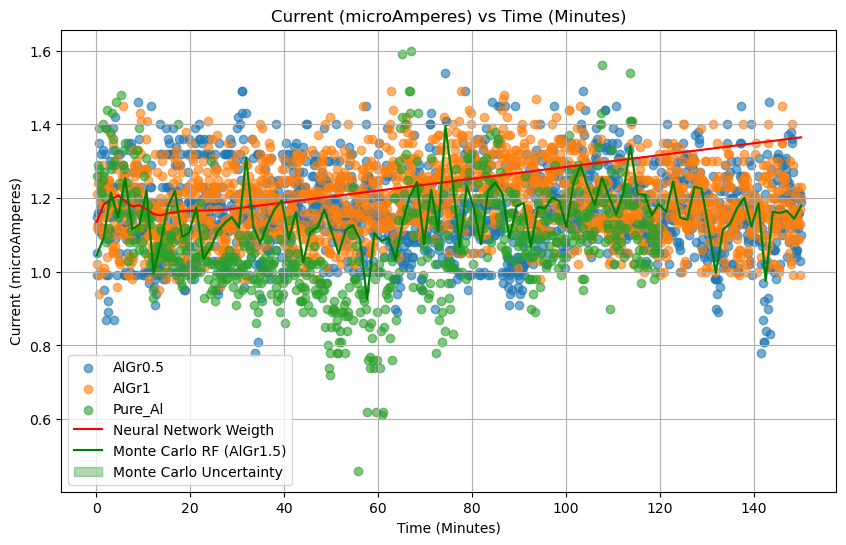

In [54]:
plt.figure(figsize=(10, 6))

plt.scatter(algr0_5["Time (Minutes)"], algr0_5["Current (microAmperes)"], label="AlGr0.5", alpha=0.6)
plt.scatter(algr1["Time (Minutes)"], algr1["Current (microAmperes)"], label="AlGr1", alpha=0.6)
plt.scatter(pure_al["Time (Minutes)"], pure_al["Current (microAmperes)"], label="Pure_Al", alpha=0.6)

plt.plot(time_algr1_5, nn_pred_algr1_5, label="Neural Network Weigth", color="red")
plt.plot(time_algr1_5, mc_mean_algr1_5, label="Monte Carlo RF (AlGr1.5)", color="green")
plt.fill_between(time_algr1_5.ravel(), mc_mean_algr1_5 - mc_std_algr1_5, mc_mean_algr1_5 + mc_std_algr1_5, color="green", alpha=0.3, label="Monte Carlo Uncertainty")

plt.title("Current (microAmperes) vs Time (Minutes)")
plt.xlabel("Time (Minutes)")
plt.ylabel("Current (microAmperes)")
plt.legend()
plt.grid()
plt.show()

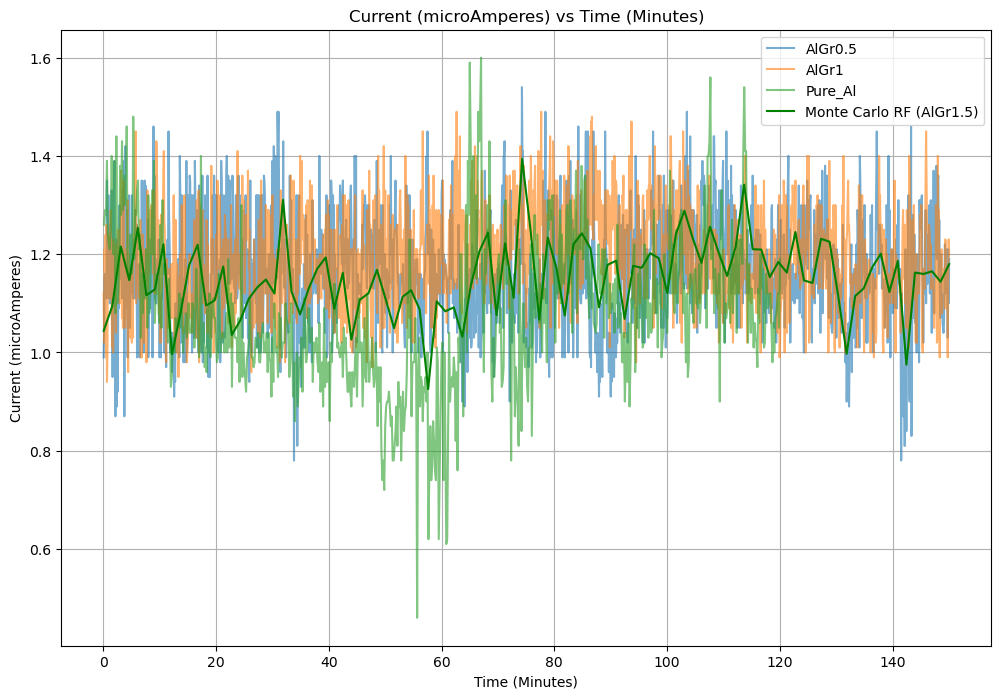

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(algr0_5["Time (Minutes)"], algr0_5["Current (microAmperes)"], label="AlGr0.5", alpha=0.6)
ax.plot(algr1["Time (Minutes)"], algr1["Current (microAmperes)"], label="AlGr1", alpha=0.6)
ax.plot(pure_al["Time (Minutes)"], pure_al["Current (microAmperes)"], label="Pure_Al", alpha=0.6)

#plt.plot(time_algr1_5, nn_pred_algr1_5, label="Neural Network (AlGr1.5)", color="red")
plt.plot(time_algr1_5, mc_mean_algr1_5, label="Monte Carlo RF (AlGr1.5)", color="green")
#plt.fill_between(time_algr1_5.ravel(), mc_mean_algr1_5 - mc_std_algr1_5, mc_mean_algr1_5 + mc_std_algr1_5, color="green", alpha=0.3, label="Monte Carlo Uncertainty")

plt.title("Current (microAmperes) vs Time (Minutes)")
plt.xlabel("Time (Minutes)")
plt.ylabel("Current (microAmperes)")
plt.legend()
plt.grid()
plt.show()

In [58]:
predicted_output = pd.DataFrame({
    "Time (Minutes)": time_algr1_5.ravel(),
    "Predicted Current (microAmperes)": mc_mean_algr1_5
})

In [59]:
output_file_path = "Predicted_Current_Stability_AlGr1.25.xlsx"
predicted_output.to_excel(output_file_path, index=False)

output_file_path

'Predicted_Current_Stability_AlGr1.25.xlsx'

In [34]:
file_algr1_5 = 'Predicted_Current_Stability_AlGr1.5.xlsx'

In [35]:
data_algr1_5 = pd.read_excel(file_algr1_5)

In [36]:
features = ["Predicted Current (microAmperes)", "Time (Minutes)"]
algr1_5 = data_algr1_5[features]

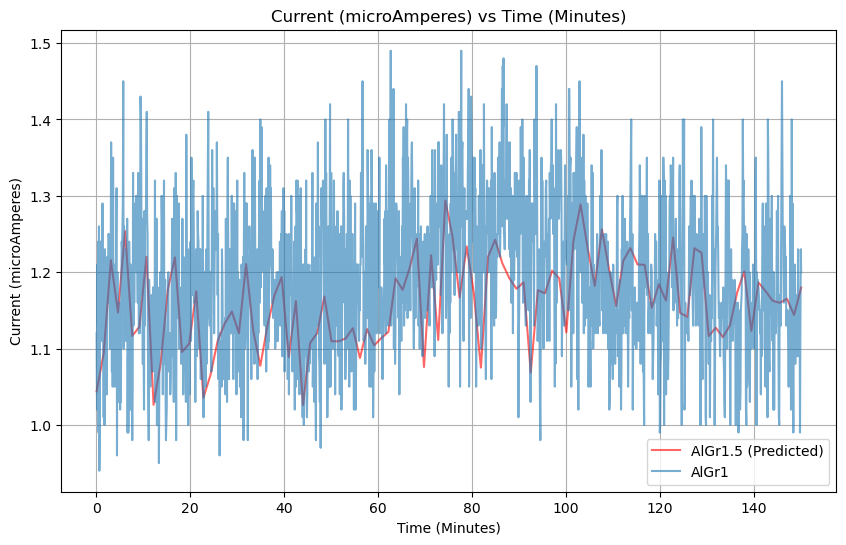

In [37]:
plt.figure(figsize=(10, 6))

plt.plot(algr1_5["Time (Minutes)"], algr1_5["Predicted Current (microAmperes)"], label="AlGr1.5 (Predicted)", alpha=0.6, color="red")
plt.plot(algr1["Time (Minutes)"], algr1["Current (microAmperes)"], label="AlGr1", alpha=0.6)

plt.title("Current (microAmperes) vs Time (Minutes)")
plt.xlabel("Time (Minutes)")
plt.ylabel("Current (microAmperes)")
plt.legend()
plt.grid()
plt.show()